In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile

sns.set(rc={'figure.figsize':(8,4)})

In [14]:
import vis

# Import Dataset 

> Note: The dataset sample used in this example has no augmented real sensors data. To download the complete dataset, use the link in the Readme file. 

In [16]:
path='Data/DataSample.zip' 
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall('Data')
zip_ref.close()
path='Data/DataSample.csv' 
df=pd.read_csv(path, sep=',')

# User Satisfaction Histogram

In [17]:
# ----------------------------- Filter out instances without a service request ----------------------------- #
dfapps=df.loc[(df['Request arrived']==1 )]

In [18]:
#------------------------------Plot figure --------------------------------#

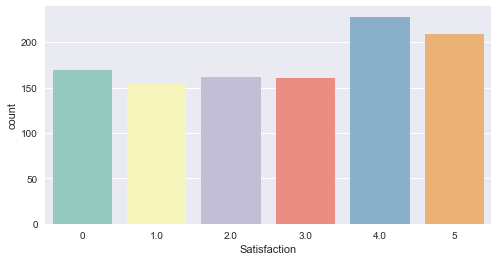

In [19]:
sat_plot= sns.countplot(x="Satisfaction", data=dfapps, palette="Set3")

In [7]:
#--------------------------- Save Plot --------------------------------#
path="Images/SatisfactionHistogram"
fig = sat_plot.get_figure()
fig.savefig(path)

# Average User Satisfaction vs. Time Period  Histogram
> In order to visualize the correlation between user satisfaction behavior and time period, we plot the average user satisfaction histogram vs. time period. 

In [8]:
#----------------- convert satisfaction cloumn type ----------------------#

In [9]:
dfapps["Satisfaction"] = pd.to_numeric(dfapps["Satisfaction"])

/Users/rawanalkurd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
GB_timeperiod=dfapps.groupby(['Time period']).mean()

In [11]:
GB_timeperiod.head()

,ID,Speed (km/hr),Request arrived,Satisfaction
Time period,,,,
After midnight,361636.197309,0.000000,1.0,3.206278
Afternoon,437745.949045,5.394646,1.0,2.802548
Early Morning,405009.513761,1.624872,1.0,2.394495
Mid-day,417599.607595,2.345765,1.0,3.113924
Morning,437453.752747,9.923138,1.0,2.500000


In [12]:
#----------------- Prepare the data frame we need to plot --------------------------#

In [13]:
Sat_Time_period_data=pd.DataFrame()
Sat_Time_period_data["Time period"]=dfapps['Time period'].unique()
Sat_Time_period_data["Average Satisfaction"]=list (GB_timeperiod['Satisfaction'] )


In [14]:
#------------------------------Plot and Save figure --------------------------------#

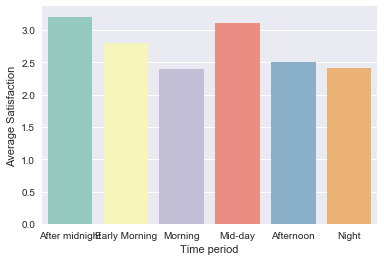

In [15]:
Sat_Time_period_plot = sns.barplot(x="Time period", y="Average Satisfaction", data=Sat_Time_period_data, palette="Set3")

In [16]:
path="Images/SatisfactionVsTBHistogram"
fig = Sat_Time_period_plot.get_figure()
fig.savefig(path)

# User Activity Histogram 

> In order to visualize the correlation between location, days, and  activity, we plot the histogram of the recorded instances on a weekday and a weekend day for the six activities at two locations.

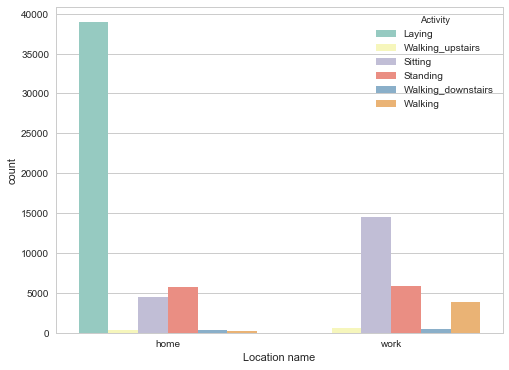

In [17]:
sns.set(rc={'figure.figsize':(8,6)})
path="Images/WP-locationVStime_WD"
vis.loc_act_plot(df[df['Date']=="2018-01-01"],['work','home'],path)

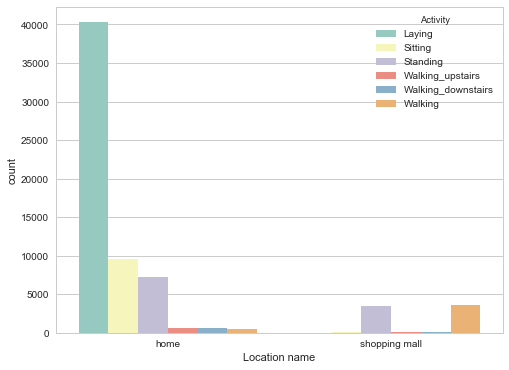

In [18]:
path="Images/WP-locationVStime_WE"
vis.loc_act_plot(df[df['Date']=='2018-01-06'],['shopping mall','home'],path)

# Heatmap


> Here we visualize the correlation between the dataset context features through a heatmap.

/Users/rawanalkurd/Desktop/rawanphd/Readme templates/1bfc2d4aecb01a834b46-d8d38c44244b84f0a6e93c200617604eb91ca9cc/vis.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[x]=le.fit_transform(df[x])
/Users/rawanalkurd/anaconda3/lib/python3.6/site-packages/biokit/viz/linkage.py:41: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, method=method, metric=metric)


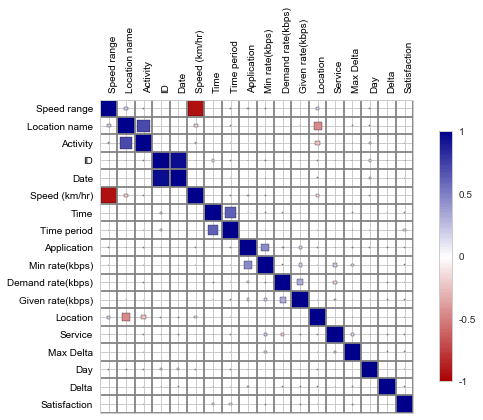

In [19]:
# ----------------------------- Define the list of columns to be droped -----------------------------#
x=['Classified days',"Request arrived",'Satisfaction with noisey lambda']
# ----------------------------- Define the path to store the heatmap-------------------------------- #
path="Images/heatmap"
#----------------------------- plot the heatmaps --------------------------------------------------- #
vis.heatmap_plot(dfapps,x,path) 

#  User location vs. Time period Percentage Plot
> Here, to visually see the relationship between time period and location for WP persona, we plot the percentage of time the user spent at each location over each time period on a weekday and a weekend day.

In [ ]:
# -----------------------------  Percentage plot for a weekday   ----------------------------- #
path='Images/time_loc_wd.jpg'
Day="Monday"
date=list(df.loc[(df['Day']==Day)]['Date'].unique())[0]
df_day=df.loc[(df['Day']==Day) & (df['Date']==date)]
vis.loc_time_per(df_day,path)

In [ ]:
# -----------------------------  Percentage plot for a weekend day   ----------------------------- #
path='Images/time_loc_we.jpg'
Day="Sunday"
date=list(df.loc[(df['Day']==Day)]['Date'].unique())[0]
df_day=df.loc[(df['Day']==Day) & (df['Date']==date)]
vis.loc_time_per(df_day,path)

---
# Thank you

